In [17]:
%matplotlib inline
import numpy as np
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import colors
from decimal import Decimal
import scipy
from scipy import special
from scipy.integrate import trapz, simps
plt.style.use('classic')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [2]:
ne = np.load("C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti262\\ti262_N_fs96.npy")
z = np.load("C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti262\\ti262_Z_fs96.npy")

In [3]:
ne.shape

(328, 16, 892)

In [4]:
ntor = ne[:,:,:].mean(axis=1)
ntt = ntor.mean(axis=1)

In [5]:
dt = 9.454e-8
T = [x*dt for x in range(ne.shape[2])]
#T = [x*dt for x in range(192)]
N_t = len(T)
T_t = dt*N_t
df_t = 1/T_t
dw_t = 2*np.pi/T_t
freq_t = np.fft.fftfreq(len(T))

In [6]:
rho_i = 7.e-4#mp

In [7]:
dZ = z[1]-z[0]

In [8]:
print('dZ', dZ)
print('delta Z', z[101]-z[100])

dZ 0.0012029999999999999
delta Z -0.0004350000000000005


In [9]:
N_z = len(z)
dt_z = dZ
T_z = dt_z*N_z
df_z = 1/T_z
dw_z = 2*np.pi/T_z
freq_z = np.fft.fftfreq(len(z))

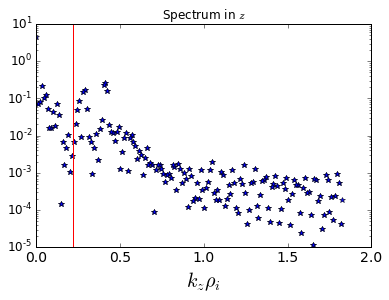

In [10]:
fou_z = np.fft.fft((ntor[:,110]-ntt[:])/np.mean(ntt[:]))
plt.semilogy(abs(freq_z*N_z*dw_z)*rho_i,abs(fou_z)**2,'*')
#print('kz',abs(freq_z*N_z*dw_z)*rho_i)
plt.axvline(x=0.22,color='r')
#plt.ylim(1.0e2,1.0e6)
plt.title(r'Spectrum in $z$')
plt.xlabel(r'$k_z \rho_i$')
plt.show()

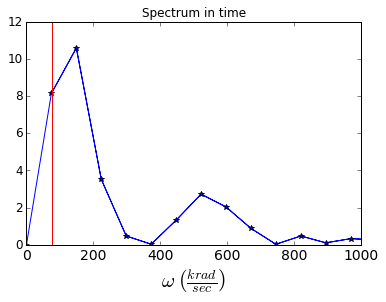

In [11]:
fou_t = np.fft.fft((ntor[164,:]-ntt[164])/np.mean(ntt))
plt.plot(abs(freq_t*N_t*dw_t)/1000,abs(fou_t)**2,'*-')
plt.xlabel(r'$\omega \;\left(\frac{krad}{sec}\right)$')
plt.title(r'Spectrum in time')
#plt.ylim(1.0e40,3.0e44)
plt.xlim(0,1000)
#plt.xlim(72000,78000)
plt.axvline(x=75,color='r')
#plt.axvline(x=4020,color='b')#640 kHz
plt.show()

In [12]:
X = abs(freq_z*N_z*dw_z)*rho_i
Y = abs(freq_t*N_t*dw_t)/1000
XX,YY = np.meshgrid(X,Y)

In [13]:
F = np.fft.fft2((ntor[:,:]-ntt[:,np.newaxis])/np.mean(ntt))

In [14]:
np.amax(abs(F))

1554.801684549906

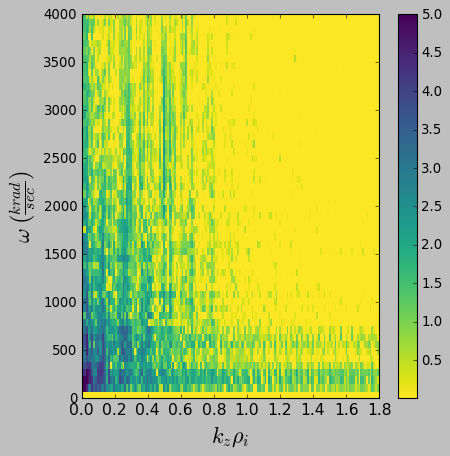

In [39]:
fig, ax = plt.subplots(figsize=(6,6))
#pos = .imshow(abs(F)/1.0e20)
pos=ax.pcolor(XX[:,:],YY[:,:],np.log(abs((F).T)),cmap='viridis_r',vmin=0.001,vmax=5)
#ax.set_aspect(1000)
plt.xlim(0,1.8)
plt.ylim(0,4000)
plt.ylabel(r'$\omega\;\left(\frac{krad}{sec}\right)$')
plt.xlabel(r'$k_z \rho_i$')
fig.colorbar(pos)
plt.show()

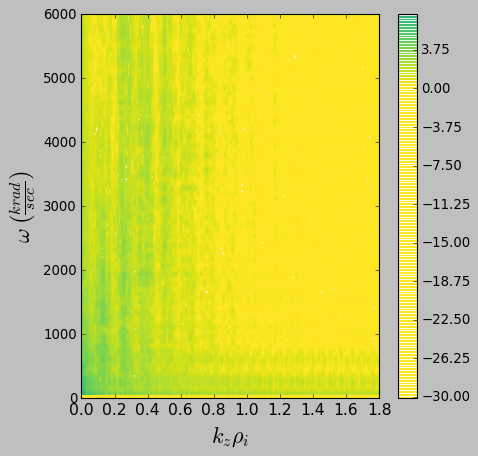

In [44]:
fig, ax = plt.subplots(figsize=(6,6))
#pos = .imshow(abs(F)/1.0e20)
pos=ax.contour(XX[:,:],YY[:,:],np.log(abs((F).T)),260,cmap='viridis_r',vmin=0.00001,vmax=20)#,norm=colors.LogNorm())
#ax.set_aspect(1000)
plt.xlim(0,1.8)
plt.ylim(0,6000)
plt.ylabel(r'$\omega \;\left(\frac{krad}{sec}\right)$')
plt.xlabel(r'$k_z \rho_i$')
fig.colorbar(pos)
plt.show()